In [ ]:
!pip install nltk


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



*   Recopilación de datos: Obtener un conjunto de datos que contenga texto en el idioma de interés y que represente el dominio en el que se va a trabajar.

* Limpieza de datos: Eliminar caracteres especiales, puntuaciones, números, y otros elementos que no aporten información relevante al modelo. También se pueden aplicar técnicas como la lematización o el stemming para reducir las palabras a su forma base.

* Tokenización: Dividir el texto en unidades más pequeñas, como palabras o subpalabras. Esto puede incluir el uso de tokenizadores específicos para el idioma o el uso de modelos pre-entrenados.

* Eliminación de stopwords: Eliminar palabras comunes que no aportan mucho significado al texto, como artículos, preposiciones y conjunciones. Estas palabras se conocen como "stopwords".

* Vectorización de palabras: Convertir las palabras en vectores numéricos para que puedan ser procesadas por el modelo. Esto se puede lograr utilizando técnicas como Bag of Words, TF-IDF, Word2Vec, GloVe, entre otras.

* Creación de conjuntos de entrenamiento y prueba: Dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba para evaluar el rendimiento del modelo.

* Entrenamiento del modelo: Utilizar el conjunto de entrenamiento para entrenar un modelo de procesamiento de lenguaje natural, como un modelo de aprendizaje profundo (por ejemplo, una red neuronal recurrente o un modelo transformer).

* Evaluación del modelo: Evaluar el modelo utilizando el conjunto de prueba para medir su rendimiento en tareas específicas, como clasificación de texto, generación de texto, análisis de sentimientos, entre otras.

* Ajuste y optimización: Realizar ajustes en el modelo, como cambiar hiperparámetros, utilizar técnicas de regularización, o probar diferentes arquitecturas, para mejorar su rendimiento.

* Despliegue del modelo: Una vez que el modelo ha sido entrenado y evaluado satisfactoriamente, se puede desplegar en un entorno de producción para su uso en aplicaciones del mundo real.



In [ ]:
import re

# Ejemplo de texto
texto = "¡Hola, mundo! Esto es una prueba de tokenización. Espero que funcione correctamente."

# Convertir a minúsculas
texto = texto.lower()

# Eliminar caracteres no alfabéticos y números
texto = re.sub(r'[^a-záéíóúüñ]', ' ', texto)

# Tokenización de palabras
tokens_palabras = texto.split()

# Eliminar stop words (opcional)
stop_words = {'a', 'de', 'que', 'es', 'la', 'una', 'lo', 'en', 'el', 'no', 'con', 'para', 'como', 'por', 'esto'}
tokens_filtrados = [palabra for palabra in tokens_palabras if palabra not in stop_words]

print("Texto original:")
print(texto)
print("\nTokens de palabras:")
print(tokens_palabras)
print("\nTokens filtrados (sin stop words):")
print(tokens_filtrados)


Texto original:
 hola  mundo  esto es una prueba de tokenización  espero que funcione correctamente 

Tokens de palabras:
['hola', 'mundo', 'esto', 'es', 'una', 'prueba', 'de', 'tokenización', 'espero', 'que', 'funcione', 'correctamente']

Tokens filtrados (sin stop words):
['hola', 'mundo', 'prueba', 'tokenización', 'espero', 'funcione', 'correctamente']


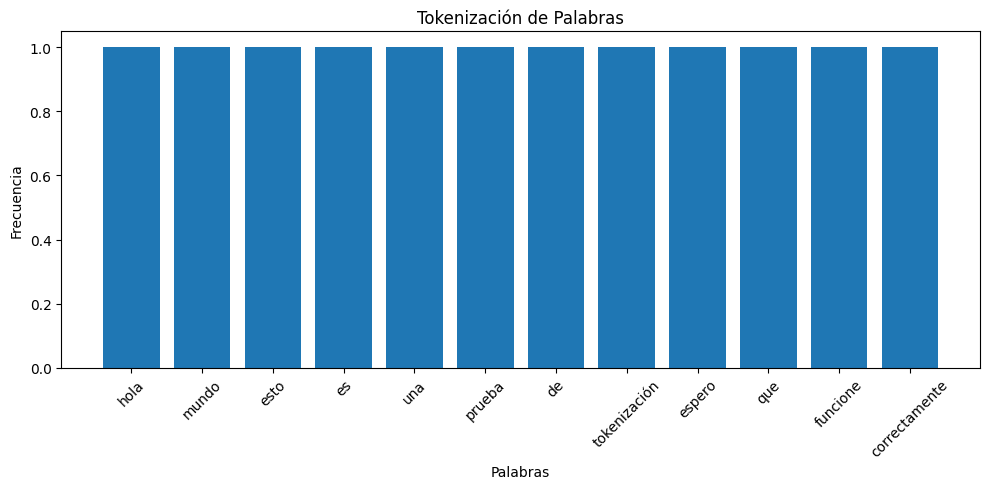

In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada palabra
frecuencia_palabras = {}
for palabra in tokens_palabras:
    frecuencia_palabras[palabra] = frecuencia_palabras.get(palabra, 0) + 1

# Graficar la frecuencia de palabras
plt.figure(figsize=(10, 5))
plt.bar(frecuencia_palabras.keys(), frecuencia_palabras.values())
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Tokenización de Palabras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


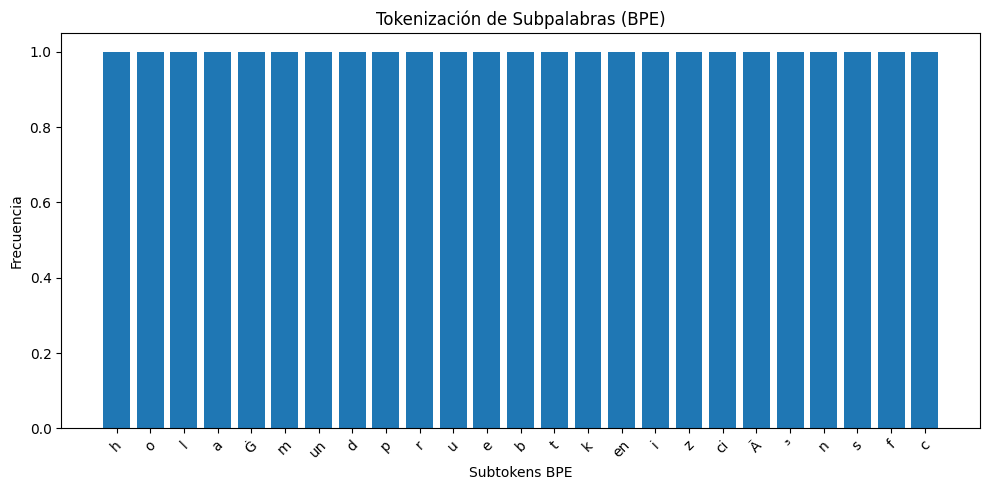

In [ ]:
from tokenizers import ByteLevelBPETokenizer

# Crear un tokenizer BPE
tokenizer_bpe = ByteLevelBPETokenizer()
tokenizer_bpe.train_from_iterator(tokens_filtrados)

# Obtener los subtokens BPE
subtokens_bpe = tokenizer_bpe.encode(" ".join(tokens_filtrados)).tokens

# Graficar los subtokens BPE
plt.figure(figsize=(10, 5))
plt.bar(subtokens_bpe, [1]*len(subtokens_bpe))
plt.xlabel('Subtokens BPE')
plt.ylabel('Frecuencia')
plt.title('Tokenización de Subpalabras (BPE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


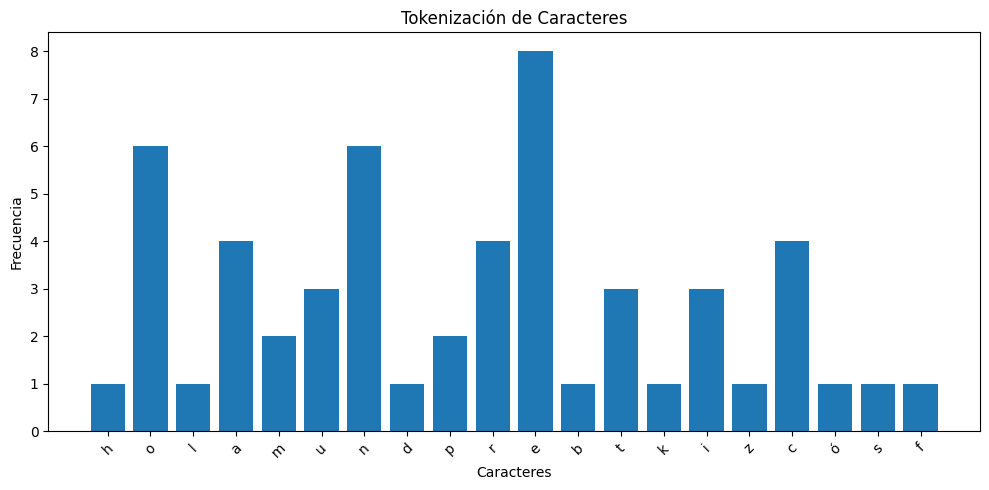

In [ ]:
# Obtener los caracteres individuales
caracteres = list("".join(tokens_filtrados))

# Contar la frecuencia de cada caracter
frecuencia_caracteres = {}
for caracter in caracteres:
    frecuencia_caracteres[caracter] = frecuencia_caracteres.get(caracter, 0) + 1

# Graficar la frecuencia de caracteres
plt.figure(figsize=(10, 5))
plt.bar(frecuencia_caracteres.keys(), frecuencia_caracteres.values())
plt.xlabel('Caracteres')
plt.ylabel('Frecuencia')
plt.title('Tokenización de Caracteres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


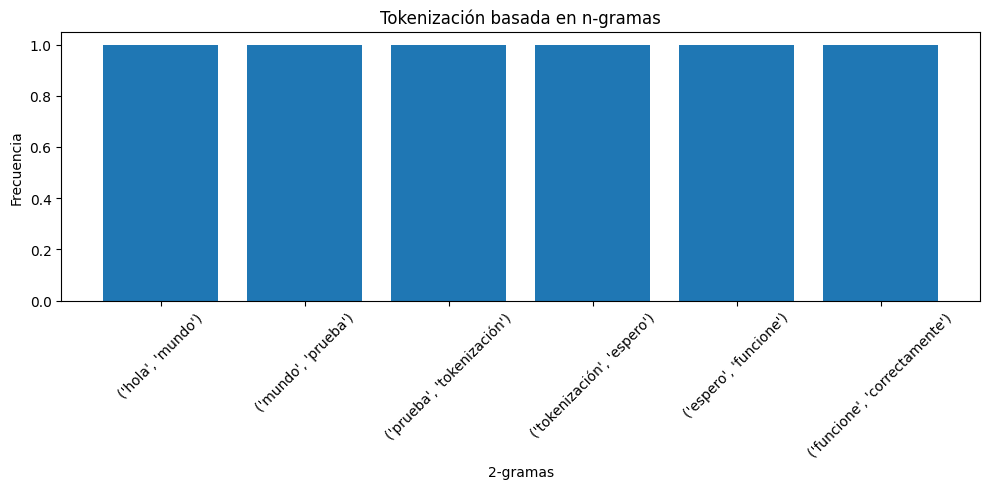

In [ ]:
from nltk.util import ngrams

# Definir el tamaño del n-grama
n = 2

# Obtener los n-gramas
ngramas = list(ngrams(tokens_filtrados, n))

# Contar la frecuencia de cada n-grama
frecuencia_ngramas = {}
for ngrama in ngramas:
    frecuencia_ngramas[ngrama] = frecuencia_ngramas.get(ngrama, 0) + 1

# Graficar la frecuencia de n-gramas
plt.figure(figsize=(10, 5))
plt.bar([str(ngrama) for ngrama in frecuencia_ngramas.keys()], frecuencia_ngramas.values())
plt.xlabel(f'{n}-gramas')
plt.ylabel('Frecuencia')
plt.title('Tokenización basada en n-gramas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


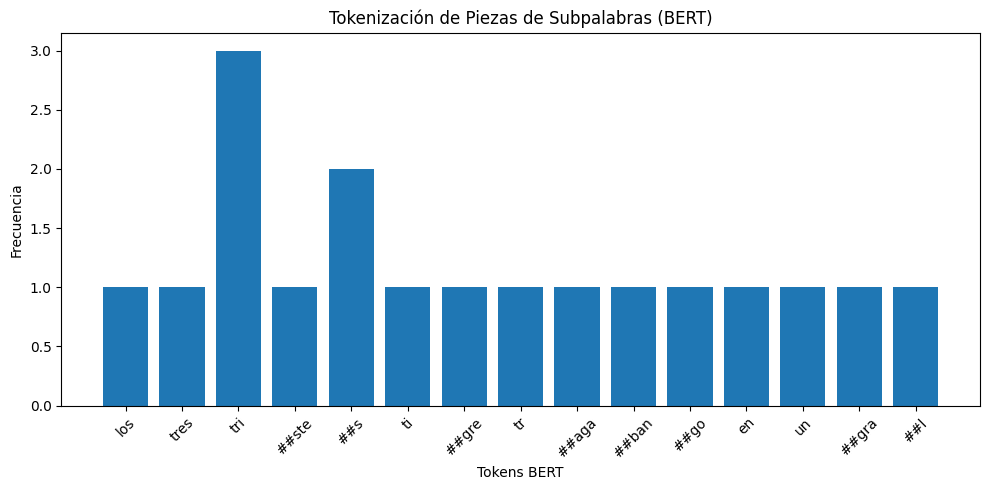

In [ ]:
from transformers import BertTokenizer
import matplotlib.pyplot as plt

# Ejemplo de texto
texto = "Los tres tristes tigres tragaban trigo en un trigral"

# Inicializar el tokenizer de BERT
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar el texto
tokens_bert = tokenizer_bert.tokenize(texto)

# Obtener la frecuencia de cada token
frecuencia_tokens_bert = {}
for token in tokens_bert:
    frecuencia_tokens_bert[token] = frecuencia_tokens_bert.get(token, 0) + 1

# Graficar la frecuencia de tokens de BERT
plt.figure(figsize=(10, 5))
plt.bar(frecuencia_tokens_bert.keys(), frecuencia_tokens_bert.values())
plt.xlabel('Tokens BERT')
plt.ylabel('Frecuencia')
plt.title('Tokenización de Piezas de Subpalabras (BERT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


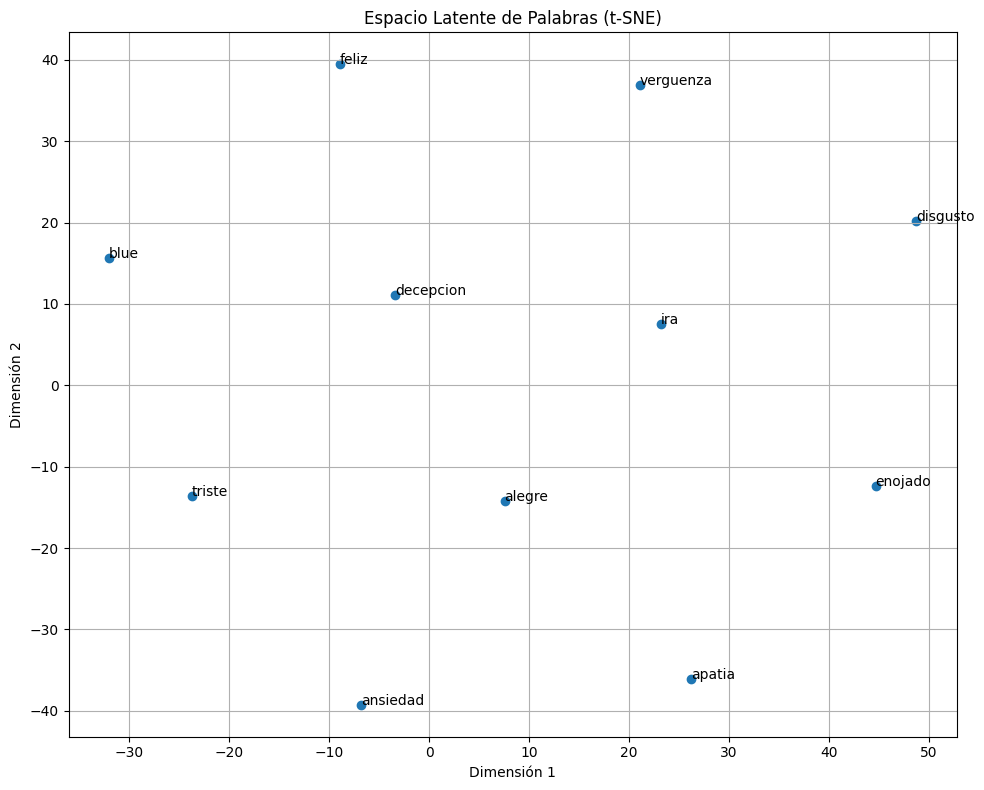

In [ ]:
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Ejemplo de texto preprocesado (ya que habíamos hecho un preprocesamiento similar antes)
tokens_filtrados = ['feliz','triste','alegre','enojado','blue','ansiedad','decepcion','disgusto','apatia','ira','verguenza']

# Entrenar un modelo Word2Vec con los tokens filtrados
modelo_word2vec = Word2Vec([tokens_filtrados], vector_size=100, window=5, min_count=1, sg=0)
palabras_vocabulario = list(modelo_word2vec.wv.index_to_key)

# Obtener los vectores de palabras
vectores_palabras = [modelo_word2vec.wv[palabra] for palabra in palabras_vocabulario]

# Convertir la lista de vectores de palabras a una matriz NumPy
matriz_vectores_palabras = np.array(vectores_palabras)

# Reducir la dimensionalidad con t-SNE (ajustando la perplexity)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
vectores_reducidos = tsne.fit_transform(matriz_vectores_palabras)

# Graficar el espacio latente de las palabras
plt.figure(figsize=(10, 8))
plt.scatter(vectores_reducidos[:, 0], vectores_reducidos[:, 1])

for i, palabra in enumerate(palabras_vocabulario):
    plt.annotate(palabra, (vectores_reducidos[i, 0], vectores_reducidos[i, 1]))

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Espacio Latente de Palabras (t-SNE)')
plt.grid(True)
plt.tight_layout()
plt.show()


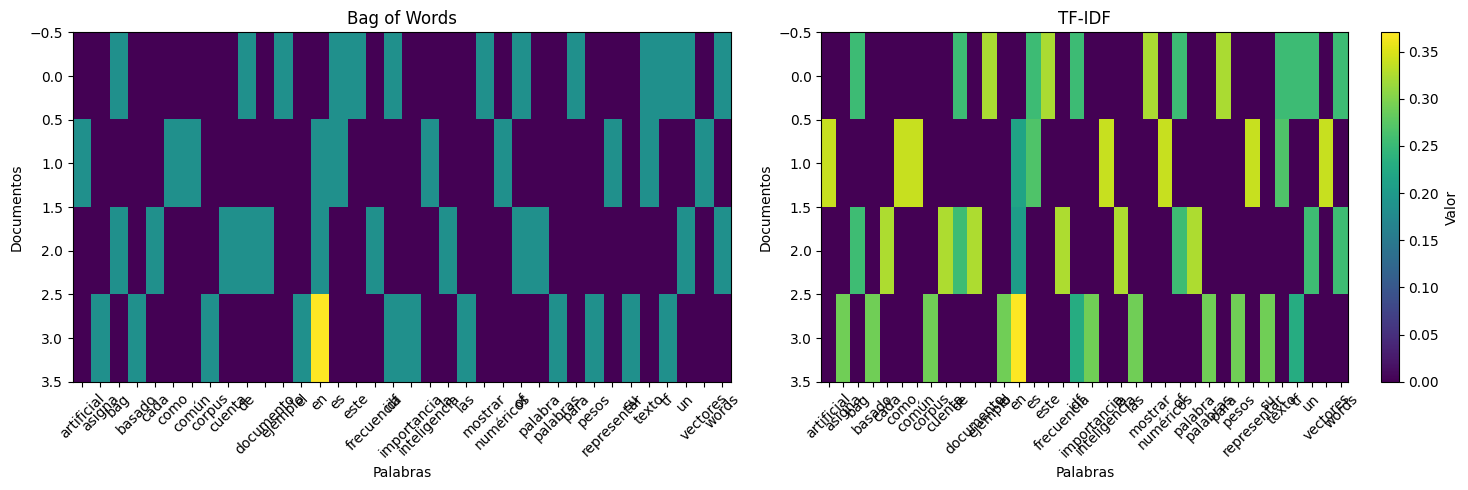

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de textos
textos = [
    "Este es un ejemplo de texto para mostrar Bag of Words y TF-IDF.",
    "En inteligencia artificial, es común representar texto como vectores numéricos.",
    "Bag of Words cuenta la frecuencia de cada palabra en un documento.",
    "TF-IDF asigna pesos a las palabras basado en su importancia en el corpus."
]

# Crear un vectorizador Bag of Words
vectorizador_bow = CountVectorizer()
bow = vectorizador_bow.fit_transform(textos)

# Crear un vectorizador TF-IDF
vectorizador_tfidf = TfidfVectorizer()
tfidf = vectorizador_tfidf.fit_transform(textos)

# Obtener las palabras del vocabulario
vocabulario = vectorizador_bow.get_feature_names_out()

# Graficar las representaciones de Bag of Words y TF-IDF
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(bow.toarray(), cmap='viridis', aspect='auto')
plt.xticks(ticks=np.arange(len(vocabulario)), labels=vocabulario, rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Documentos')
plt.title('Bag of Words')

plt.subplot(1, 2, 2)
plt.imshow(tfidf.toarray(), cmap='viridis', aspect='auto')
plt.xticks(ticks=np.arange(len(vocabulario)), labels=vocabulario, rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Documentos')
plt.title('TF-IDF')

plt.colorbar(label='Valor')
plt.tight_layout()
plt.show()


In [ ]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt

# Descargar el modelo Word2Vec pre-entrenado en español
model = api.load('word2vec-google-news-300')

# Función para obtener los embeddings de palabras
def obtener_embeddings(palabras):
    embeddings = []
    for palabra in palabras:
        try:
            embedding = model[palabra]
            embeddings.append(embedding)
        except KeyError:
            print(f"La palabra '{palabra}' no está en el vocabulario.")
    return np.array(embeddings)

# Función para graficar los embeddings en un espacio 2D
def graficar_embeddings(embeddings, palabras):
    plt.figure(figsize=(8, 6))
    for i, palabra in enumerate(palabras):
        plt.scatter(embeddings[i][0], embeddings[i][1], marker='o', label=palabra)
        plt.text(embeddings[i][0], embeddings[i][1], palabra, fontsize=12, ha='right')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.title('Embeddings de Palabras')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Obtener palabras del usuario
texto_usuario = input("Ingrese una lista de palabras separadas por espacios: ")
palabras_usuario = texto_usuario.split()

# Obtener embeddings de las palabras del usuario
embeddings_usuario = obtener_embeddings(palabras_usuario)

# Graficar los embeddings en un espacio 2D
if len(embeddings_usuario) > 0:
    graficar_embeddings(embeddings_usuario, palabras_usuario)


[=-------------------------------------------------] 3.9% 64.8/1662.8MB downloaded

KeyboardInterrupt: 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar recursos de NLTK (si es necesario)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Texto de ejemplo
texto = " shitty"

# Tokenización y eliminación de stopwords
tokens = word_tokenize(texto.lower())
stop_words = set(stopwords.words('spanish'))
tokens_filtrados = [palabra for palabra in tokens if palabra not in stop_words]

# Análisis de sentimientos utilizando VADER
analyzer = SentimentIntensityAnalyzer()
sentimientos = analyzer.polarity_scores(' '.join(tokens_filtrados))
print( sentimientos['compound'])
# Interpretar los resultados
if sentimientos['compound'] >= 0.05:
    print("El texto tiene un sentimiento positivo.")
elif sentimientos['compound'] <= -0.05:
    print("El texto tiene un sentimiento negativo.")
else:
    print("El texto tiene un sentimiento neutro.")


-0.5574
El texto tiene un sentimiento negativo.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
